In [1]:
import pandas as pd
from ebmdatalab import bq
import numpy as np

In [2]:
# very slow sql import! Avoid!
sql = '''SELECT * FROM ebmdatalab.hscic.prescribing_hospital_community_2019_01'''

#df = bq.cached_read(sql, csv_path='prescribing_hospital_2019_01.csv')  # add `use_cache=False` to override

#df.head()

## Import data

In [3]:
df = pd.read_csv('Hospital Data 201901.csv')
df.head()


,PERIOD,BNF NAME,BNF CODE,HOSPITAL TRUST CODE,HOSPITAL TRUST,QUANTITY,TOTAL QUANTITY,TOTAL ITEMS,TOTAL ACTUAL COST,TOTAL NIC
0,201901,Gaviscon Infant_Sach 2g (Dual Pack) S/F,0101021B0BEADAJ,R0A00,MANCHESTER UNIVERSITY NHS FT,42.0,42.0,1,12.642394,13.50
1,201901,Gaviscon Advance_Liq (Aniseed) (Reckitt),0101021B0BEAIAL,R0A00,MANCHESTER UNIVERSITY NHS FT,500.0,1000.0,2,9.529033,10.24
2,201901,Gaviscon Advance_Liq (Aniseed) (Reckitt),0101021B0BEAIAL,R0A00,MANCHESTER UNIVERSITY NHS FT,300.0,300.0,1,5.414220,5.82
3,201901,Gaviscon Advance_Liq (Aniseed) (Reckitt),0101021B0BEAIAL,R0A00,MANCHESTER UNIVERSITY NHS FT,280.0,280.0,1,5.152242,5.43
4,201901,Hyoscine Butylbrom_Tab 10mg,0102000N0AAABAB,R0A00,MANCHESTER UNIVERSITY NHS FT,21.0,21.0,1,1.161207,1.13


## Sum total prescribing by trust

In [4]:
df1 = df.groupby(["PERIOD","HOSPITAL TRUST CODE"]).sum().reset_index()
df1.head()

,PERIOD,HOSPITAL TRUST CODE,QUANTITY,TOTAL QUANTITY,TOTAL ITEMS,TOTAL ACTUAL COST,TOTAL NIC
0,201901,R0A00,137990.5,234584.5,2461,81438.708130,87462.83
1,201901,R1A00,300.0,480.0,5,287.544377,309.63
2,201901,R1C00,16840.0,27303.0,477,14368.595580,15455.13
3,201901,R1D00,6804.0,8810.0,176,1888.865032,2025.48
4,201901,R1E00,3072.0,3072.0,30,926.481375,996.08


# Join Trust sites - NB acute only in this lookup table

In [5]:
trust = pd.read_csv('etrust.csv')
# append zeroes to all 3-digit trust codes
trust2 = trust.copy()
trust2.loc[trust2["code"].str.len() <5, "code"] = trust2["code"]+"00"
trust2

,code,name,national grouping,high level health geography,address 1,address 2,address 3,address 4,address 5,postcode,open date,close date
0,R0A00,MANCHESTER UNIVERSITY NHS FOUNDATION TRUST,Y54,Q83,COBBETT HOUSE,OXFORD ROAD,NaN,MANCHESTER,GREATER MANCHESTER,M13 9WL,20171001,NaN
1,R0A01,MANCHESTER UNIVERSITY HOSPITAL NHS FT (HQ),Y54,Q83,OXFORD ROAD,NaN,NaN,MANCHESTER,GREATER MANCHESTER,M13 9WL,20171001,NaN
2,R0A02,MANCHESTER ROYAL INFIRMARY,Y54,Q83,OXFORD ROAD,NaN,NaN,MANCHESTER,GREATER MANCHESTER,M13 9WL,20171001,NaN
3,R0A03,ROYAL MANCHESTER CHILDREN'S HOSPITAL,Y54,Q83,OXFORD ROAD,NaN,NaN,MANCHESTER,GREATER MANCHESTER,M13 9WL,20171001,NaN
4,R0A04,MANCHESTER ROYAL EYE HOSPITAL,Y54,Q83,OXFORD ROAD,NaN,NaN,MANCHESTER,GREATER MANCHESTER,M13 9WL,20171001,NaN
5,R0A05,ST MARY'S HOSPITAL,Y54,Q83,OXFORD ROAD,NaN,NaN,MANCHESTER,GREATER MANCHESTER,M13 9WL,20171001,NaN
6,R0A06,UNIVERSITY DENTAL HOSPITAL OF MANCHESTER,Y54,Q83,HIGHER CAMBRIDGE STREET,NaN,NaN,MANCHESTER,GREATER MANCHESTER,M15 6FH,20171001,NaN
7,R0A07,WYTHENSHAWE HOSPITAL,Y54,Q83,SOUTHMOOR ROAD,WYTHENSHAWE,NaN,MANCHESTER,GREATER MANCHESTER,M23 9LT,20171001,NaN
8,R0A08,WITHINGTON COMMUNITY HOSPITAL,Y54,Q83,NELL LANE,WEST DIDSBURY,NaN,MANCHESTER,GREATER MANCHESTER,M20 2LR,20171001,NaN
9,R0A09,TRAFFORD GENERAL HOSPITAL,Y54,Q83,MOORSIDE ROAD,URMSTON,NaN,MANCHESTER,GREATER MANCHESTER,M41 5SL,20171001,NaN


## Import and join hospital locations

In [6]:
df2 = df1.merge(trust2[["code", "name", "address 5", "postcode"]], left_on="HOSPITAL TRUST CODE", right_on="code").drop("code", axis=1)
df2["pcode"] = df2["postcode"].str.split(' ').str.get(0) # extract first part of postcode

pcodes = pd.read_csv("postcode-outcodes.csv") # from https://www.freemaptools.com/download-uk-postcode-lat-lng.htm

df3 = df2.merge(pcodes, left_on="pcode", right_on="postcode")
df3.sort_values(by="TOTAL ITEMS", ascending=False).head()

,PERIOD,HOSPITAL TRUST CODE,QUANTITY,TOTAL QUANTITY,TOTAL ITEMS,TOTAL ACTUAL COST,TOTAL NIC,name,address 5,postcode_x,pcode,id,postcode_y,latitude,longitude
198,201901,RXK00,421356.13,1011040.54,12577,162194.838401,174148.38,SANDWELL AND WEST BIRMINGHAM HOSPITALS NHS TRUST,WEST MIDLANDS,B18 7QH,B18,54,B18,52.49132,-1.92341
168,201901,RVV00,472913.41,927220.32,11799,236662.735836,254284.80,EAST KENT HOSPITALS UNIVERSITY NHS FOUNDATION ...,KENT,CT1 3NG,CT1,523,CT1,51.27719,1.08733
142,201901,RRE00,422404.00,2858581.00,10391,179877.001519,191984.98,MIDLANDS PARTNERSHIP NHS FOUNDATION TRUST,STAFFORDSHIRE,ST16 3SR,ST16,2421,ST16,52.81315,-2.11871
34,201901,RC900,377729.10,717137.10,8990,134156.964578,143832.61,LUTON AND DUNSTABLE UNIVERSITY HOSPITAL NHS FO...,BEDFORDSHIRE,LU4 0DZ,LU4,1520,LU4,51.89871,-0.46650
51,201901,RDU00,455744.35,796878.79,8871,146747.696661,157391.81,FRIMLEY HEALTH NHS FOUNDATION TRUST,SURREY,GU16 7UJ,GU16,988,GU16,51.31100,-0.72868


## Map postcodes to points

In [7]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

geometry = [Point(xy) for xy in zip( df3['longitude'], df3['latitude'])]

geo_df = gpd.GeoDataFrame(df3, geometry=geometry)
geo_df.head()

,PERIOD,HOSPITAL TRUST CODE,QUANTITY,TOTAL QUANTITY,TOTAL ITEMS,TOTAL ACTUAL COST,TOTAL NIC,name,address 5,postcode_x,pcode,id,postcode_y,latitude,longitude,geometry
0,201901,R0A00,137990.5,234584.5,2461,81438.708130,87462.83,MANCHESTER UNIVERSITY NHS FOUNDATION TRUST,GREATER MANCHESTER,M13 9WL,M13,1527,M13,53.46030,-2.21389,POINT (-2.21389 53.4603)
1,201901,R1A00,300.0,480.0,5,287.544377,309.63,WORCESTERSHIRE HEALTH AND CARE NHS TRUST,WORCESTERSHIRE,WR4 9RW,WR4,2787,WR4,52.20438,-2.18440,POINT (-2.1844 52.20438)
2,201901,R1C00,16840.0,27303.0,477,14368.595580,15455.13,SOLENT NHS TRUST,HAMPSHIRE,SO19 8BR,SO19,2359,SO19,50.90244,-1.35429,POINT (-1.35429 50.90244000000001)
3,201901,R1D00,6804.0,8810.0,176,1888.865032,2025.48,SHROPSHIRE COMMUNITY HEALTH NHS TRUST,SHROPSHIRE,SY3 8XL,SY3,2481,SY3,52.69923,-2.76959,POINT (-2.76959 52.69923000000001)
4,201901,RXW00,134058.0,249510.5,4334,41980.513591,44983.61,SHREWSBURY AND TELFORD HOSPITAL NHS TRUST,SHROPSHIRE,SY3 8XQ,SY3,2481,SY3,52.69923,-2.76959,POINT (-2.76959 52.69923000000001)


### Set up a blank CCG map

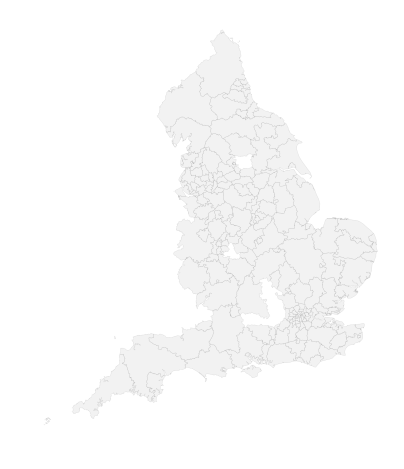

In [8]:
import matplotlib.pyplot as plt
from ebmdatalab import maps

ccgs = gpd.read_file('ccgs.json')

ccgs = ccgs[~ccgs['geometry'].isnull()]  # remove ones without geometry - these are federations rather than individual CCGs


names = pd.read_csv('ccg_for_map.csv')
names = names.rename(columns={"CCG17CDH":"pct", "CCG17NM":"name"})
names['name'] = names['name'].str.upper()
names['name'] = names["name"].str.replace("&","AND")
names["zeroes"] = 0

names.head()

gdf = ccgs[["name","geometry"]].merge(names[["name","pct","zeroes"]], on ="name")

plt.figure(figsize=(12,8))
# The CCG column must be named 'pct'
#plt = maps.ccg_map(names, title="CCGs", column=, separate_london=False)
ax = plt.subplot()
gdf.plot(ax=ax, edgecolor='black', linewidth=0.4, legend=False, alpha=0.1, color="grey")
ax.set_aspect(1.63)

plt.axis('off')
plt.show()


## Plot hospital data onto CCG map

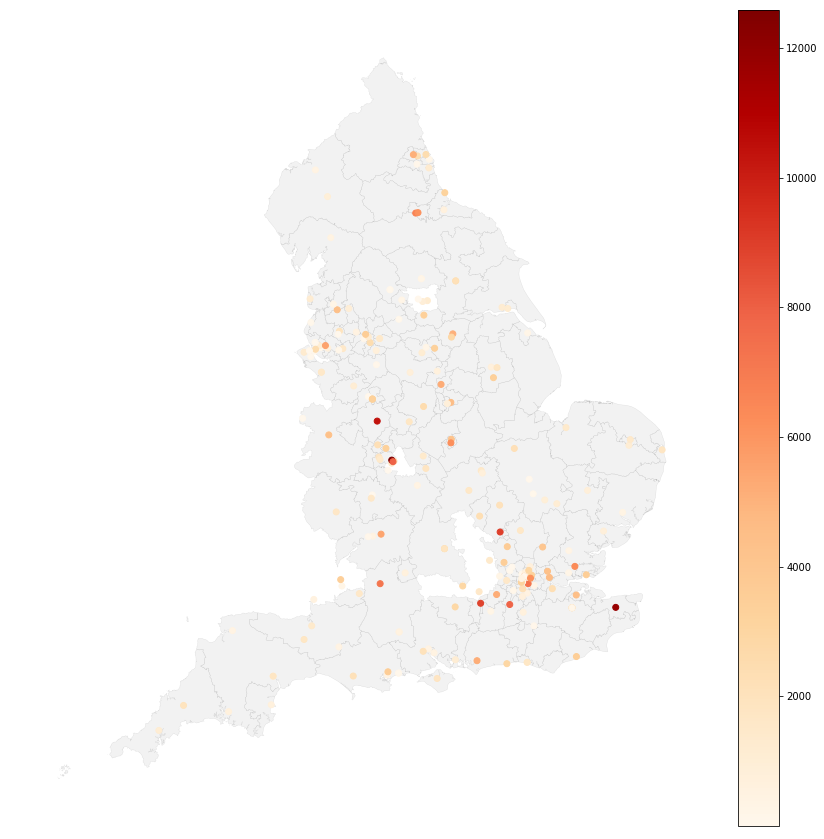

In [9]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize = (15,15))

# The CCG column must be named 'pct'
#maps.ccg_map(names, title="CCGs", column='zeroes', separate_london=False)

gdf.plot(ax=ax, edgecolor='black', linewidth=0.4, legend=False, alpha=0.1, color="grey")
ax.set_aspect(1.63)
geo_df.plot(ax=ax, column="TOTAL ITEMS",legend=True, cmap='OrRd')

plt.axis('off')
plt.show()

# Prescribing by chemical

## Import BNF 

In [10]:

sql = '''SELECT presentation, presentation_code, chapter, chemical FROM ebmdatalab.hscic.bnf'''

bnf = bq.cached_read(sql, csv_path='bnf.csv')  # add `use_cache=False` to override

bnf.head()

,presentation,presentation_code,chapter,chemical
0,Langdales_Cinnamon Tab,010101000BBABA0,Gastro-Intestinal System,Other Antacid & Simeticone Preps
1,Mylanta 11_Tab,010101000BBADA0,Gastro-Intestinal System,Other Antacid & Simeticone Preps
2,Mylanta 11_Liq,010101000BBAEA0,Gastro-Intestinal System,Other Antacid & Simeticone Preps
3,Rennie Plus_Tab,010101000BBAFA0,Gastro-Intestinal System,Other Antacid & Simeticone Preps
4,Sab Simplex_Susp,010101000BBAIA0,Gastro-Intestinal System,Other Antacid & Simeticone Preps


## List most prescribed chemicals

In [15]:
chem = df.merge(bnf, left_on="BNF CODE", right_on="presentation_code")
chem.drop("PERIOD", axis=1).groupby("chemical").sum().sort_values(by="TOTAL ITEMS", ascending=False).head(20)

,QUANTITY,TOTAL QUANTITY,TOTAL ITEMS,TOTAL ACTUAL COST,TOTAL NIC
chemical,,,,,
Methadone Hydrochloride,2475183.0,18708846.0,31285,175129.891707,182898.97
Buprenorphine Hydrochloride,34428.0,271448.0,13227,378300.803197,403494.72
Methylphenidate Hydrochloride,183683.0,557928.0,12628,428204.997547,460892.85
Sertraline Hydrochloride,78850.0,318874.0,9636,15558.918091,15967.68
Prednisolone,409068.0,730612.0,9344,34027.171781,35842.37
Quetiapine,130913.0,319885.0,8818,119701.788460,127945.44
Dexamethasone,89799.0,149576.5,7899,61553.545317,66057.07
Diazepam,71710.0,197346.0,7620,8339.976899,7759.44
Melatonin,198944.0,627365.0,6908,314167.704961,338173.40


## Prescribing by chapter

In [13]:
chem.drop("PERIOD", axis=1).groupby("chapter").sum().sort_values(by="TOTAL ITEMS", ascending=False)

,QUANTITY,TOTAL QUANTITY,TOTAL ITEMS,TOTAL ACTUAL COST,TOTAL NIC
chapter,,,,,
Central Nervous System,5318379.00,25248809.20,187084,3.126314e+06,3344521.89
Infections,791790.00,1663429.00,37474,4.160487e+05,446291.88
Eye,270447.00,485291.50,27025,3.198600e+05,344028.15
Cardiovascular System,451736.00,871689.00,24643,2.769608e+05,296865.62
Skin,1359885.82,3198327.87,23408,5.734560e+05,617124.37
Gastro-Intestinal System,1371247.00,2013768.00,20291,2.762255e+05,296182.76
Endocrine System,639063.50,1066585.50,18959,3.933575e+05,422350.56
Appliances,391406.00,906302.00,13877,2.585375e+05,278355.22
Nutrition And Blood,4449185.00,6077527.00,12517,4.352132e+05,464831.40
